<a href="https://colab.research.google.com/github/spandanab2023/EDA_AppStore/blob/my_branch_1/EDA_Submission_Playstore_App_Review_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



:##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### **Team Member 1 -** Spandana Bonala


# **Project Summary -**

The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. Each app (row) has values for category, rating, size, and more. Another dataset contains customer reviews of the Android app.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

To explore and analyse the data to discover key factors responsible for app engagement and success.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [2]:
# Import Libraries
#Libraries used
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset Loading

In [3]:
# Load Dataset
#mounting the drive so as to access the files from google drive
from google.colab import drive
drive.mount('/content/drive')
filepath_playstore="/content/drive/MyDrive/EDA/DataFiles/Play Store Data.csv"
filepath_user_reviews="/content/drive/MyDrive/EDA/DataFiles/User Reviews.csv"
#ps_df is the dataframe name for Playstore data
ps_df=pd.read_csv(filepath_playstore)
#ur_df is the dataframe name for UserReview data
ur_df=pd.read_csv(filepath_user_reviews)
#ps_df_main
ps_df_main=pd.read_csv(filepath_playstore)

Mounted at /content/drive


### Dataset First View

In [4]:
# Dataset First Look
ps_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
ur_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [6]:
ur_df.info()
#(10841, 13) this is the ps_df dataframe size
#(64295, 5) this is for ur_df dataframe size

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


### Dataset Rows & Columns count

In [7]:
# Dataset Rows & Columns count
ps_df.shape, ur_df.shape


((10841, 13), (64295, 5))

### Dataset Information

In [8]:
# Dataset Info

ps_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [9]:
ur_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


#### Duplicate Values

In [10]:
# Dataset Duplicate Value Count
ps_df.drop_duplicates(inplace=True)
ps_df.shape
#Earlier the entries were 10841. Now, after removing duplicates it is 10358
ur_df.drop_duplicates(inplace=True)
ur_df.shape

(30679, 5)

#### Missing Values/Null Values

In [11]:
# Missing Values/Null Values Count
ur_df.isnull().sum()

App                         0
Translated_Review         987
Sentiment                 982
Sentiment_Polarity        982
Sentiment_Subjectivity    982
dtype: int64

In [12]:
ps_df.isnull().sum()

App                  0
Category             0
Rating            1465
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [13]:
# Visualizing the missing values


### What did you know about your dataset?

ps_df dataframe:

1. The dataset has 13 columns.
2. Null values are in the columns Rating, Type, ContentRating, Current Ver, Android Ver.
3. There are 10,841 rows.

ur_df dataframe:
1. This dataframe has 5 columns.
2. Null values are in the columns Translated_Review, Sentiment, Sentiment_Polarity, Sentiment_Subjectivity.
3. There are 64,295 rows in this dataframe.

## ***2. Understanding Your Variables***

In [14]:
# Dataset Columns
ps_df.columns, ur_df.columns

(Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
        'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
        'Android Ver'],
       dtype='object'),
 Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
        'Sentiment_Subjectivity'],
       dtype='object'))

In [15]:
# Dataset Describe
ps_df.describe()

,Rating
count,8893.000000
mean,4.189542
std,0.545452
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [16]:
ur_df.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,29697.000000,29697.000000
mean,0.188836,0.490848
std,0.355672,0.266029
min,-1.000000,0.000000
25%,0.000000,0.350000
50%,0.157143,0.514286
75%,0.422500,0.652500
max,1.000000,1.000000


### Variables Description

**Play Store DataFrame ps_df:**

App: The name of the application.

Category: The category or type of the app.

Rating: The average rating given by users for the app.

Reviews: The number of user reviews for the app.

Size: The size of the app.

Installs: The number of times the app has been installed.

Type: The type of the app (e.g., Free, Paid).

Price: The price of the app (if it's a paid app).

Content Rating: The content rating for the app (e.g., Everyone, Teen, Adults only, etc.).

Genres: The genre(s) of the app.

Last Updated: The date of the last update for the app.

Current Ver: The current version of the app.

Android Ver: The minimum Android version required to run the app.



**User Review Data Frame - ur_df:**

And here's a brief description of each column in this DataFrame:

App: The name of the app

Translated_Review: The translated version of user reviews for the app.
Sentiment: The sentiment label associated with the translated review (e.g., positive, negative, neutral).

Sentiment_Polarity: A numeric value representing the polarity of the sentiment (e.g., -1 to 1, where -1 is negative, 1 is positive).

Sentiment_Subjectivity: A numeric value representing the subjectivity of the sentiment (e.g., 0 to 1, where 0 is objective, 1 is subjective).








### Check Unique Values for each variable.

In [17]:
# Check Unique Values for each variable.
#Checking the unique value for category variable
ps_df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [18]:
ps_df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated', nan], dtype=object)

In [19]:
ps_df['Type'].unique()

array(['Free', 'Paid', nan, '0'], dtype=object)

In [20]:
ps_df['Genres'].unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education;Education', 'Education', 'Education;Creativity',
       'Education;Music & Video', 'Education;Action & Adventure',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role 

## 3. ***Data Wrangling***

### Data Wrangling Code

In [21]:
# Write your code to make your dataset analysis ready.
#Dropping all the rows that doesnot have any review related information from the UserReview DataFrame but they just have app name.
#The rows are dropped because each row has zero information apart from the App name.
ur_df1=ur_df.dropna()
#Shape of the DataFrame "UserReview" before dropping the null values is (64295, 5)
#Shape of the DataFrame "UserReview" after dropping the null values is (37427, 5)

ur_df1.shape

(29692, 5)

In [22]:
ur_df1.isna().sum()
#Now the USER REVIEW dataframe doesnt have any null values.

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

In [23]:
#Replacing the null values in "Rating" column, Playstore dataframe with zero because it means the app is not reviewed yet
ps_df['Rating'].fillna(0, inplace=True)
ps_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10358 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10358 non-null  object 
 1   Category        10358 non-null  object 
 2   Rating          10358 non-null  float64
 3   Reviews         10358 non-null  object 
 4   Size            10358 non-null  object 
 5   Installs        10358 non-null  object 
 6   Type            10357 non-null  object 
 7   Price           10358 non-null  object 
 8   Content Rating  10357 non-null  object 
 9   Genres          10358 non-null  object 
 10  Last Updated    10358 non-null  object 
 11  Current Ver     10350 non-null  object 
 12  Android Ver     10355 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [24]:
#Handling the null values for the column Android Ver in ps_df dataframe
ps_df['Android Ver'].unique()
#Replacing null values with "Varies with device"
ps_df['Android Ver'].fillna('Varies with device', inplace=True)

In [25]:
#Handling the null values for the column Current Ver in the ps_df dataframe that has playstore data
ps_df['Current Ver'].fillna('Varies with device', inplace=True)

In [26]:
#Handling null value in column 'Type' of ps_df dataframe
ps_df['Type'].unique()
ps_df.loc[ps_df.loc[:,'Type'].isnull()]
#Price is zero so fill the nullvalue in the Type column of ps_df dataframe with the value 'Free'
ps_df['Type'].fillna('Free', inplace=True)

In [27]:
#Handling null value in column 'Content Rating'
ps_df.loc[ps_df.loc[:,'Content Rating'].isnull()]
ps_df['Content Rating'].unique()
#Replacing the value with 'Unrated'
ps_df['Content Rating'].fillna('Unrated',inplace=True)

In [28]:
#Getting the number of apps listed in each category
ps_df_cat=ps_df.groupby('Category').agg({'App':'count'}).reset_index().rename(columns={'App':'Count of Apps'}).sort_values('Count of Apps', ascending=False)

ps_df_cat.head()
#The top categories where apps listed are 'FAMILY', 'GAME', 'TOOLS', 'MEDICAL', 'BUSINESS'
ps_df_cat.tail()
#The bottom catogories where the apps built/enlisted are less are 'EVENTS', PARENTING', 'COMICS', 'BEAUTY'

,Category,Count of Apps
11,EVENTS,64
23,PARENTING,60
6,COMICS,60
3,BEAUTY,53
0,1.9,1


In [29]:
ps_df_type=ps_df[ps_df.loc[:,'Type']!='0']

In [30]:
#To get a dataframe that has Content rating grouped by Type
"""
1. Tells us a small number of apps targeted towards mature audiences, with ratings such as "Adults only 18+" , "Mature 17+."
 This highlights the presence of content specifically designed for older users within the app market.
Furthermore, the data reveals that the majority of apps in this sample are available for free, as indicated by the higher count of apps under the "Free" type.
However, there is also a notable presence of paid apps across different content rating categories, catering to diverse user preferences and needs.
"""
ps_df_type.groupby(['Type', 'Content Rating']).agg({'App':'count'}).reset_index()


,Type,Content Rating,App
0,Free,Adults only 18+,3
1,Free,Everyone,7720
2,Free,Everyone 10+,345
3,Free,Mature 17+,428
4,Free,Teen,1094
5,Free,Unrated,2
6,Paid,Everyone,662
7,Paid,Everyone 10+,32
8,Paid,Mature 17+,19
9,Paid,Teen,52


In [52]:
#Converting the Reviews column to integer
#ps_df['Reviews_int']=ps_df['Reviews'].astype(int)
def convert_int (str):
    try:
      return int(str)
    except ValueError:
      return 0

ps_df['Reviews_int']=ps_df['Reviews'].apply(convert_int)
ps_df_main['Reviews_int']=ps_df_main['Reviews'].apply(convert_int)
ps_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Reviews_int,Installs int,size_kbytes
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,159,10000,19000.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,967,500000,14000.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,87510,5000000,8700.0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,215644,50000000,25000.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,967,100000,2800.0


In [32]:
#This analysis is to understand the two tables joined together
#First, grouped the table based on the app name in the user reviews dataframe.
ur_df_r=ur_df1.groupby('App').agg({'Translated_Review':'count'}).reset_index().rename(columns={'Translated_Review':'Review_count'})
#To get max reviews in each app
#ps_df_ur - is dataframe that has unique row for each app with maximum reviews
ps_df_ur=ps_df.groupby(['App','Category','Rating','Size','Installs','Type','Price','Content Rating','Genres']).agg({"Reviews_int":"max"}).reset_index()
ps_df_ur.head()
#Joined both the dataframes ur_df1 and ps_df to get the number of reviews for each app
merged_df = pd.merge(ps_df_ur, ur_df_r, how='left',left_on='App',right_on='App').sort_values('Review_count', ascending=False)
merged_df.head(20)
#The top apps that have highest reviews also have very less number of reviews in the translated reviews dataframe.


,App,Category,Rating,Size,Installs,Type,Price,Content Rating,Genres,Reviews_int,Review_count
4365,Facebook,SOCIAL,4.1,Varies with device,"1,000,000,000+",Free,0,Teen,Social,78158306,130.0
4029,Episode - Choose Your Story,GAME,4.3,Varies with device,"50,000,000+",Free,0,Teen,Simulation,1841061,124.0
4028,Episode - Choose Your Story,FAMILY,4.3,Varies with device,"50,000,000+",Free,0,Teen,Simulation,1842381,124.0
734,Angry Birds Classic,GAME,4.4,97M,"100,000,000+",Free,0,Everyone,Arcade,5566908,107.0
4393,Family Locator - GPS Tracker,LIFESTYLE,4.4,45M,"10,000,000+",Free,0,Everyone,Lifestyle,726074,105.0
4982,Google Photos,PHOTOGRAPHY,4.5,Varies with device,"1,000,000,000+",Free,0,Everyone,Photography,10859051,101.0
2345,Calorie Counter - Macros,HEALTH_AND_FITNESS,4.0,5.5M,"100,000+",Free,0,Everyone,Health & Fitness,3061,100.0
104,8fit Workouts & Meal Planner,HEALTH_AND_FITNESS,4.6,67M,"10,000,000+",Free,0,Everyone,Health & Fitness,115721,100.0
2648,ColorNote Notepad Notes,PRODUCTIVITY,4.6,Varies with device,"100,000,000+",Free,0,Everyone,Productivity,2401017,99.0
2346,Calorie Counter - MyFitnessPal,HEALTH_AND_FITNESS,4.6,Varies with device,"50,000,000+",Free,0,Everyone,Health & Fitness,1873523,99.0


In [33]:
ps_df.sort_values('Reviews',ascending=False).head()
ps_df['Reviews'].unique


<bound method Series.unique of 0           159
1           967
2         87510
3        215644
4           967
          ...  
10836        38
10837         4
10838         3
10839       114
10840    398307
Name: Reviews, Length: 10358, dtype: object>

### What all manipulations have you done and insights you found?


1. Created a dataframe to get the top and bottom categories where the Apps are listed and found below:
   The top categories where apps listed are 'FAMILY', 'GAME', 'TOOLS', 'MEDICAL', 'BUSINESS'
   The bottom categories where the apps are built/enlisted are 'EVENTS', 'PARENTING', 'COMICS', 'BEAUTY'.

2. Created a dataframe with type, contentrating and number of apps.
    
    Found that the "FREE" type apps which have content rating as "Everyone" has highest number 7720

3. Reviews column has the datatype as object which is not easy for analysis. Hence, converted its datatype to int.

4. Merged both the dataframes ur_df and ps_df using "App" name, as it is common between both the datasets. Found from the merged dataset that:
 Although, there are large number of reviews in ps_df[review] column, only a hundreds of translated_reviews are present in ur_df.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

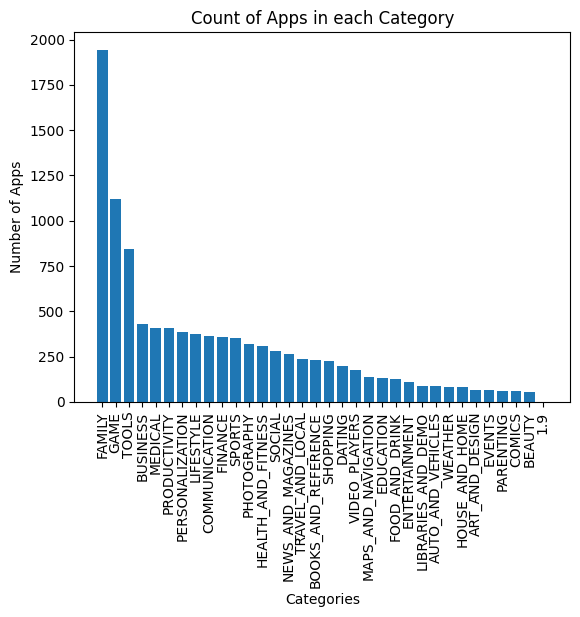

In [34]:
# Chart - 1 visualization code
x=ps_df_cat['Category']
y=ps_df_cat['Count of Apps']
plt.bar(x,y,align='center')
plt.title('Count of Apps in each Category')
plt.xticks(rotation=90)
plt.xlabel('Categories')
plt.ylabel('Number of Apps')
plt.show()

##### 1. Why did you pick the specific chart?

This particular chart is picked up by me because it gives the basic information on how many apps are there in each of the Categories.

##### 2. What is/are the insight(s) found from the chart?

1. The top categories where apps listed are 'FAMILY', 'GAME', 'TOOLS',

'MEDICAL', 'BUSINESS'
2. The bottom catogories where the apps built/enlisted are less are 'EVENTS', PARENTING', 'COMICS', 'BEAUTY'

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Creating a new app in the top categories will be like fighting with lot of apps that are already existing. The bottom categories like 'BEAUTY' does not have many apps. Developing an app in this category will be beneficial for the app owners/creators.

#### Chart - 2

In [35]:
# Chart - 2 visualization code
#Top 10 Apps with highest installs
ps_df.loc[:,('App','Installs')]
def to_convert(str):
  if str[-1]=='+' :
     return (str[:-1].replace(',',''))
  else :
     return 0


#to_convert('50,000+') - this gives the output as 50000
ps_df['Installs int']=ps_df['Installs'].apply(to_convert).astype(int)
ps_df.head()
ps_df_ur['Installs int']=ps_df_ur['Installs'].apply(to_convert).astype(int)

In [36]:
df_top10=ps_df_ur.loc[:,['App','Category', 'Type','Installs int']].sort_values('Installs int', ascending=False).reset_index()
df_top10

,index,App,Category,Type,Installs int
0,4984,Google Play Games,ENTERTAINMENT,Free,1000000000
1,4966,Google Chrome: Fast & Secure,COMMUNICATION,Free,1000000000
2,4969,Google Drive,PRODUCTIVITY,Free,1000000000
3,4982,Google Photos,PHOTOGRAPHY,Free,1000000000
4,6109,Maps - Navigate & Explore,TRAVEL_AND_LOCAL,Free,1000000000
...,...,...,...,...,...
9754,7175,Popsicle Launcher for Android P 9.0 launcher,PERSONALIZATION,Paid,0
9755,598,Ak Parti Yardım Toplama,SOCIAL,Paid,0
9756,2667,Command & Conquer: Rivals,FAMILY,Free,0
9757,8400,Test Application DT 02,ART_AND_DESIGN,Free,0


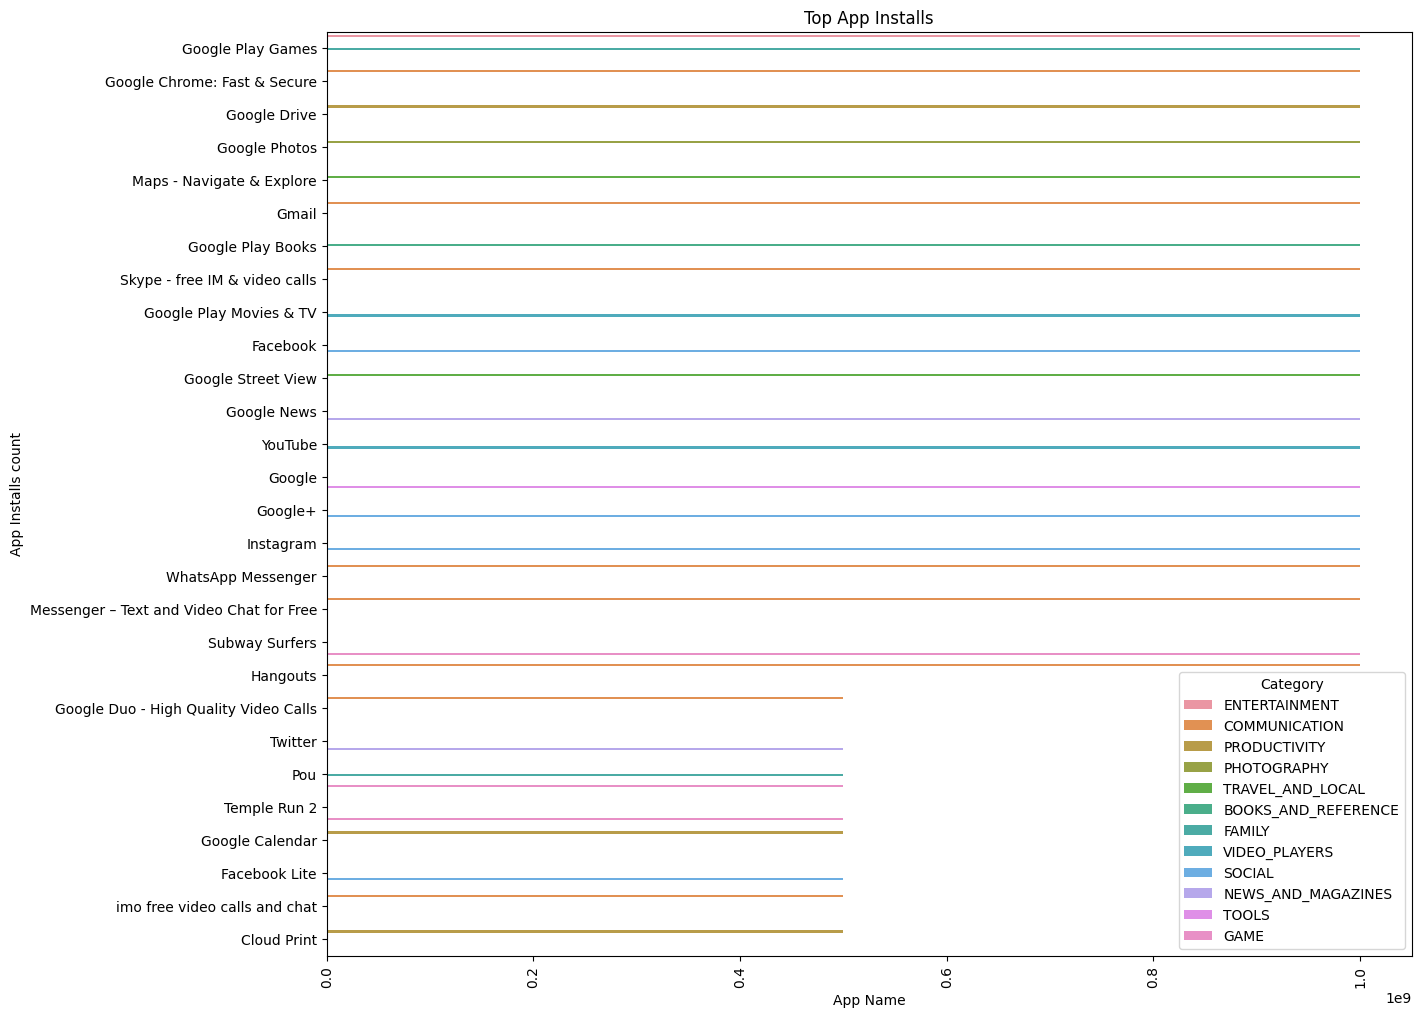

In [37]:
x=df_top10['App']
y=df_top10['Installs int']
plt.figure(figsize=(14,12))
sns.barplot(y='App', x='Installs int', hue='Category', data=df_top10.head(30), orient='h')
plt.title('Top App Installs')
plt.xlabel('App Name')
plt.ylabel('App Installs count')
plt.xticks(rotation=90)
plt.show()

##### 1. Why did you pick the specific chart?

This chart lets us know the top installs.

##### 2. What is/are the insight(s) found from the chart?

All the top installs are Free Apps and also all of them are 1 billion + downloads. Although the exact number is not given we know that they are above the 1 billion number.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

We just know that the SOCIAL category apps have occupied the top places in the number of installations. Launching an app in SOCIAL category would give more installations.

#### Chart - 3

In [38]:
# Chart - 3 visualization code
#Top apps that are paid and have highest number of downloads
#ps_df_3 is the dataframe that stores the top paid apps with high downloads
ps_df_3=ps_df[ps_df.loc[:,'Type']=='Paid'].groupby('Category').agg({'Installs int':'sum'}).reset_index().sort_values('Installs int',ascending=False).rename(columns={'Installs int':'Number of App Installs'}).head()
ps_df_3

,Category,Number of App Installs
9,FAMILY,31200814
12,GAME,21099965
20,PERSONALIZATION,4258794
21,PHOTOGRAPHY,1978740
26,TOOLS,1727441


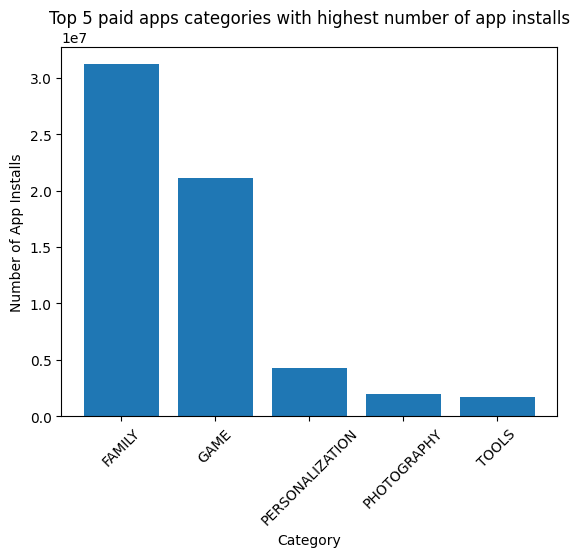

In [39]:
plt.bar(ps_df_3['Category'], ps_df_3['Number of App Installs'])
plt.title('Top 5 paid apps categories with highest number of app installs')
plt.xlabel('Category')
plt.ylabel('Number of App Installs')
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

This chart will show us the categories that have paid downloads. Knowing this will help us to know which category paid app will have good revenue.

##### 2. What is/are the insight(s) found from the chart?

From the chart we can understand that an app in 'FAMILY' and 'GAME' doing well can be made paid because of the downloads we see from these apps.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Having a paid App in FAMILY category has higher returns on investments.

#### Chart - 4

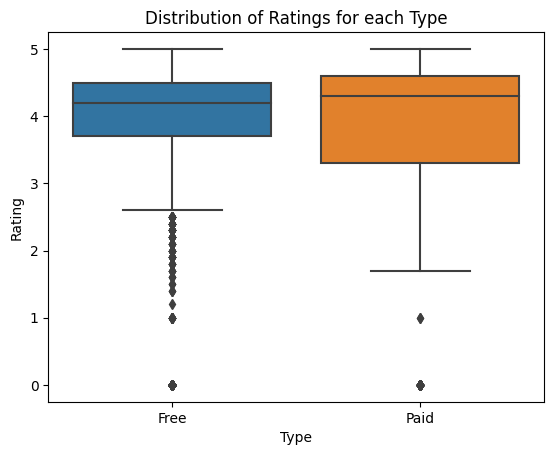

In [40]:
# Chart - 4 visualization code
sns.boxplot(data=ps_df[ps_df.loc[:,'Type']!='0'], x="Type", y='Rating')
plt.title('Distribution of Ratings for each Type')
plt.show()


##### 1. Why did you pick the specific chart?

This boxplot shows how ratings are distributed for each of the app categories.

##### 2. What is/are the insight(s) found from the chart?

Although both free and paid apps have similar average ratings, free apps have several extreme low ratings. For paid apps, the distribution of ratings is consistent between 3.5 to 4.5.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Free users are more susceptible to extreme ratings, which may be less reliable. On the other hand, paid users tend to provide more consistent and straightforward ratings.

#### Chart - 5

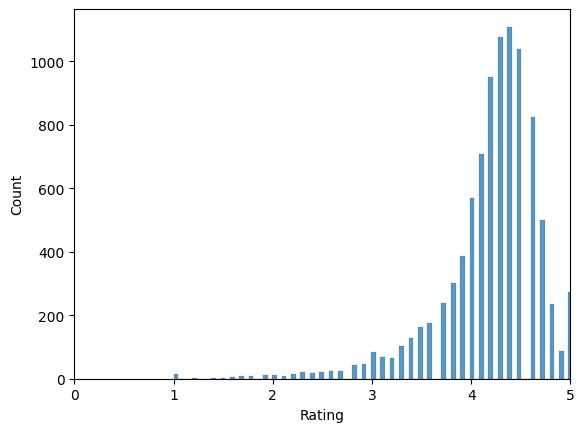

In [41]:
# Chart - 5 visualization code
#Histogram showing number of users by rating
# Used the unmodified dataframe that has null values in Ratings column for a clear understanding of the frequency of the users.
sns.histplot(data=ps_df_main, x="Rating")
plt.xlim(0,5)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Very high or unexpected

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This chart shows number of users by rating.

#### Chart - 6

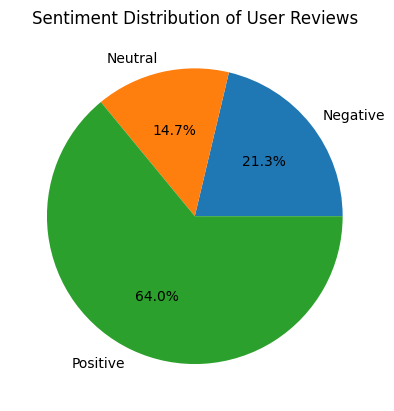

In [42]:
# Chart - 6 visualization code
# Pie chart to explore the sentiment distribution in the second dataframe i.e., user reviews
sentiment_counts=ur_df1.groupby(['Sentiment']).size().reset_index()
#Got the values from the above step and converted them into dictionary to create a pie chart
sentiment_counts_dict = {'Negative': 6321, 'Neutral': 4356, 'Positive': 19015}

# Plotting the pie chart
plt.pie(sentiment_counts_dict.values(), labels=sentiment_counts_dict.keys(), autopct='%1.1f%%')
plt.title("Sentiment Distribution of User Reviews")
plt.show()

##### 1. Why did you pick the specific chart?

This chart tells us how the Sentiments of the user ratings are distributed.

##### 2. What is/are the insight(s) found from the chart?

It is good to see that users who have given their reviews have put their effort to give some good words about the respective apps.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

While every review is thoroughly evaluated for potential app improvements, there are also reviews that provide positive feedback and encouragement.

#### Chart - 7

In [43]:
# Chart - 7 visualization code
#Create a scatter plot to explore the relationship between app size and number of reviews for paid apps.
ps_df['Size'].unique()
def convert_to_kb(value):
    try:
        if value.endswith('M'):
            return int(float(value[:-1]) * 1000)
        elif value.endswith('k'):
            return int(float(value[:-1]))
        elif value == 'Varies with device':
            return None
        else:
            return int(value)
    except ValueError:
        return None



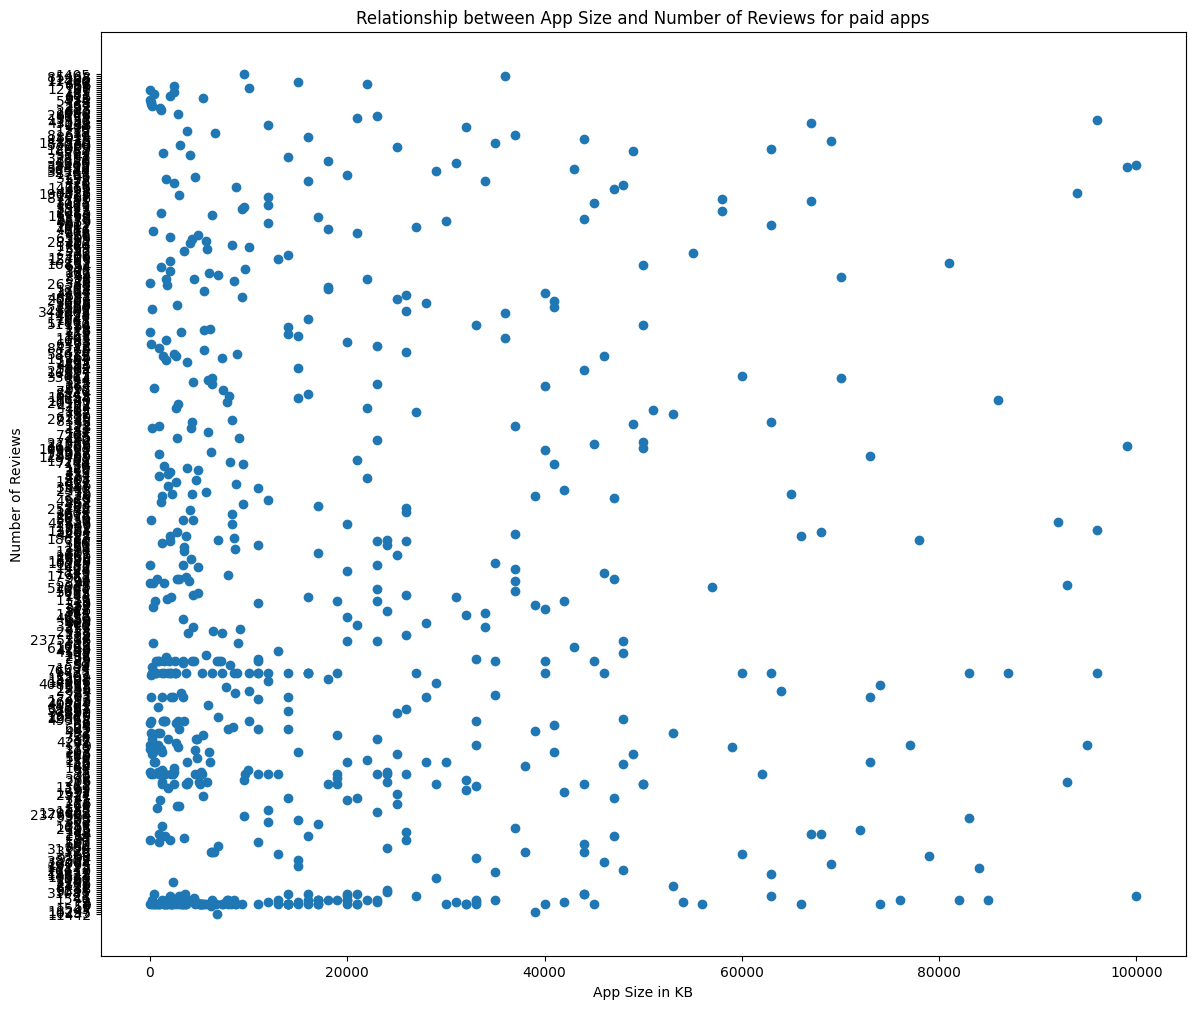

In [51]:

ps_df['size_kbytes']=ps_df['Size'].apply(convert_to_kb)
ps_df_main['size_kbytes']=ps_df_main['Size'].apply(convert_to_kb)
plt.figure(figsize=(14,12))
plt.scatter(ps_df[ps_df.loc[:,'Type']=='Paid']['size_kbytes'], ps_df[ps_df.loc[:,'Type']=='Paid']['Reviews'])
#plt.gca().get_yaxis().get_major_ticks()
#plt.tight_layout()
plt.xlabel('App Size in KB')
plt.ylabel('Number of Reviews')
plt.title('Relationship between App Size and Number of Reviews for paid apps')
plt.show()

##### 1. Why did you pick the specific chart?

.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

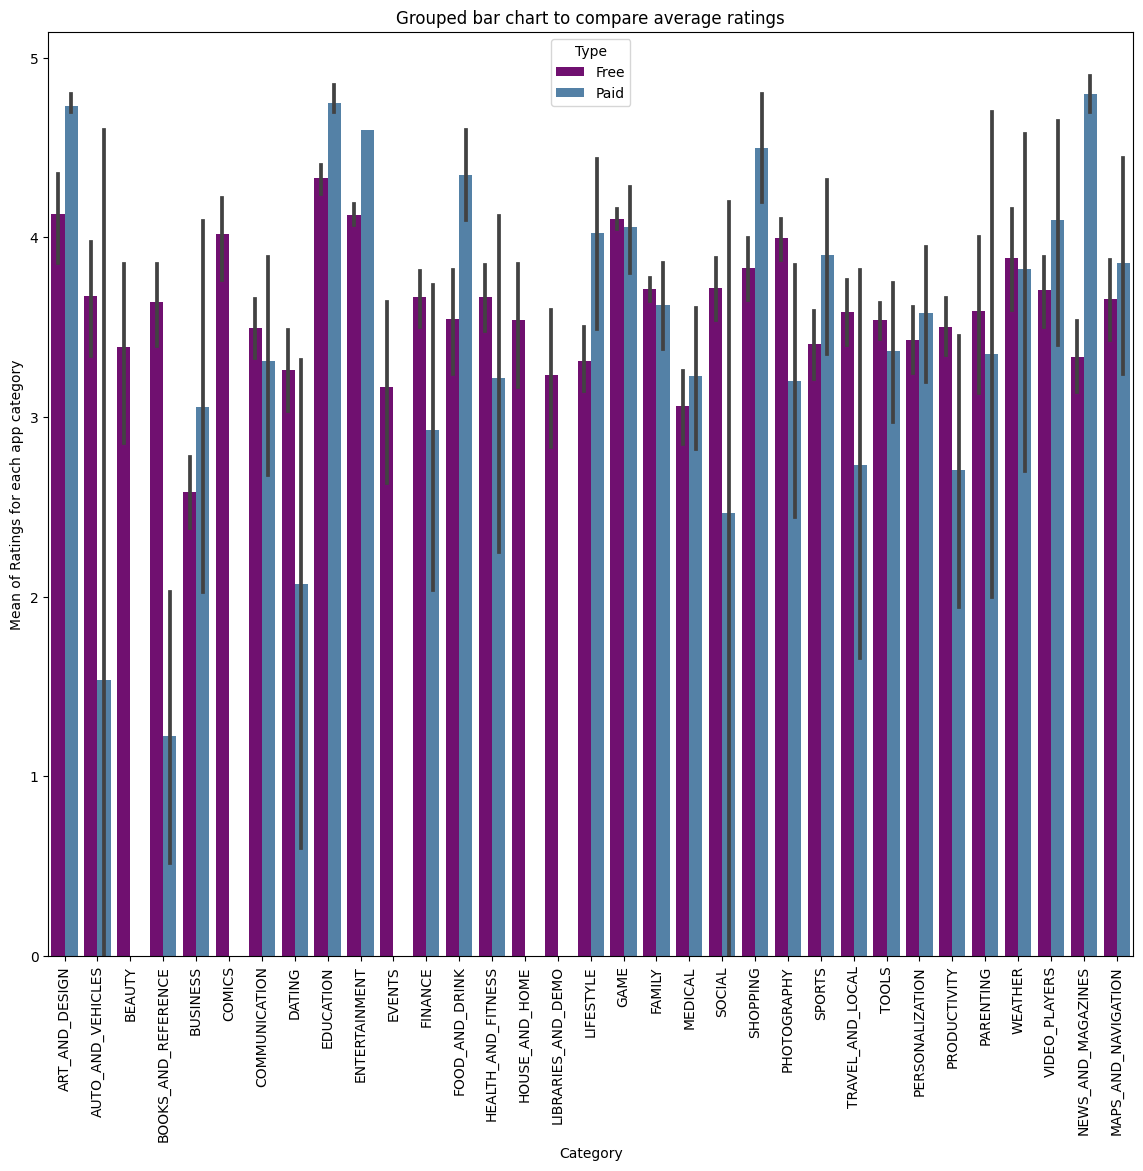

In [45]:
# Chart - 8 visualization code
#grouped bar chart to compare the average ratings for different app categories.
plt.figure(figsize=(14,12))
sns.barplot(x='Category', y='Rating', hue='Type', data=ps_df[ps_df.loc[:,'Type']!='0'],palette=['purple', 'steelblue'])
plt.xticks(rotation=90)
plt.title('Grouped bar chart to compare average ratings')
plt.xlabel('Category')
plt.ylabel('Mean of Ratings for each app category')
plt.show()

##### 1. Why did you pick the specific chart?

This particular chart shows the average ratings of the paid/Free apps in each categories.

##### 2. What is/are the insight(s) found from the chart?

"NEWS AND MAGAZINES" paid category has highest average ratings.

Free "EDUCATION" apps have highest average ratings.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Education category , if  an app is launched is expected to recieve good ratings either in paid or free type.

#### Chart - 9

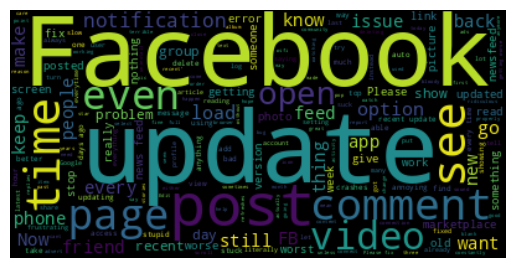

In [46]:
# Chart - 9 visualization code
#This chart is for getting the overiew of reviews of Facebook app
ur_df1.groupby('App').agg({'Translated_Review':'count'}).reset_index().sort_values('Translated_Review', ascending=False).head(1)
#We got the top app with highest Reviews as Facebook with 130 Reviews
#Joining all the Reviews for Facebook app
text_data = ' '.join(ur_df1[ur_df1.loc[:,'App']=='Facebook']['Translated_Review'])

from wordcloud import WordCloud

word_cloud=WordCloud().generate(text_data)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [47]:
ps_df.corr()

<ipython-input-47-2edb0e451e03>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ps_df.corr()


,Rating,Reviews_int,Installs int,size_kbytes
Rating,1.000000,0.079056,0.083364,0.165774
Reviews_int,0.079056,1.000000,0.634998,0.237893
Installs int,0.083364,0.634998,1.000000,0.168872
size_kbytes,0.165774,0.237893,0.168872,1.000000


##### 1. Why did you pick the specific chart?

This specific wordwall helps us know any negative/positive words that are used by the Reviewers and action can be taken immediately.

##### 2. What is/are the insight(s) found from the chart?

The words with a larger font size help us grasp the essence of the reviews at a glance.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This word cloud is created specifically from user reviews of the Facebook app. Words such as 'issue' and 'make' indicate areas that may require attention from the app owners, allowing them to address these concerns promptly.

#### Chart - 10 - Correlation Heatmap

<ipython-input-48-7c875ca0c730>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=ps_df.corr(), annot=True, cmap="coolwarm")


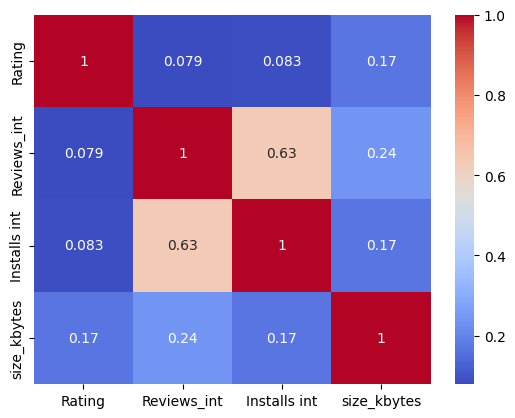

In [48]:
# Correlation Heatmap visualization code
sns.heatmap(data=ps_df.corr(), annot=True, cmap="coolwarm")
plt.show()

##### 1. Why did you pick the specific chart?

To visualize the relationships and patterns in a dataset by displaying the magnitude of values as colors.

##### 2. What is/are the insight(s) found from the chart?

1. A correlation of 0.63 between reviews and installs indicates a moderate positive relationship, suggesting that apps with more installs tend to have more reviews.

2. It appears that there is a weak positive correlation between "Rating" and "Reviews_int" as well as between "Installs int" and "size_kbytes."

3. A correlation coefficient of 0.083364 indicates a very weak positive correlation between "Installs int" (the number of app installs) and "Rating" (the average rating of the app). This means that there is a slight tendency for apps with more installs to have slightly higher ratings, but the relationship is extremely weak.

4. A correlation coefficient of 0.237893 between "Reviews_int" and "size_kbytes" indicates that larger app sizes might be associated with a slightly higher number of reviews, but the relationship is not particularly strong.

#### Chart - 11 - Pair Plot

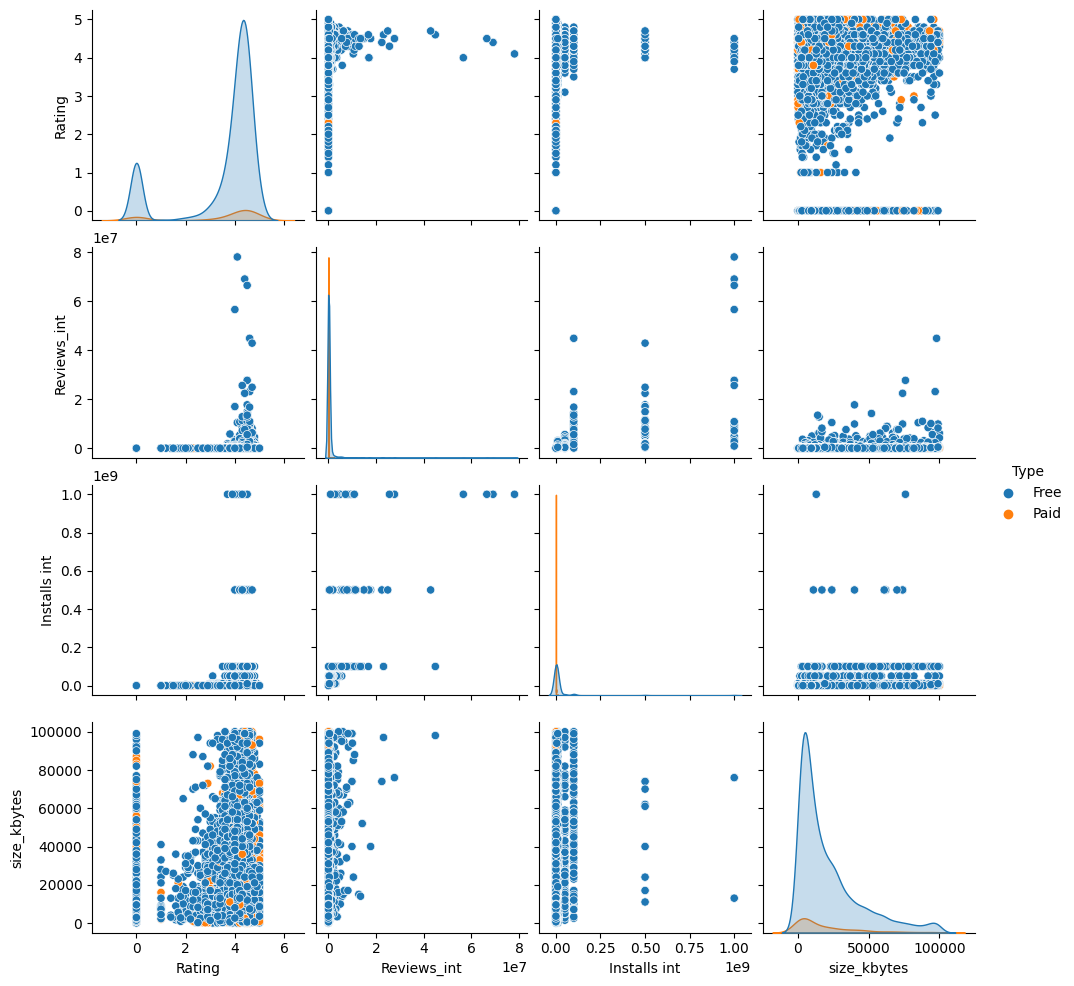

In [54]:
# Pair Plot visualization code
sns.pairplot(data=ps_df[ps_df.loc[:,'Type']!='0'], hue="Type")
plt.show()

##### 1. Why did you pick the specific chart?

 Pair plot provides a quick and visual way to examine the relationships between all pairs of variables in the dataset simultaneously. This helps to identify potential patterns, correlations, or trends between the variables.

##### 2. What is/are the insight(s) found from the chart?

Analysis done without the points concentrated around zero because zero is replaced instead of null values in the numerical columns.

1. Users tend to download a given app more if it has been reviewed by a large number of people.


# **Conclusion**



*   Average rating of apps is 4.18

*    The top categories where apps listed are 'FAMILY', 'GAME', 'TOOLS',
     'MEDICAL', 'BUSINESS'

*  Top app installs are mainly of google apps like maps, google play apps, chrome etc...

*   Free users are more susceptible to extreme ratings, which may be less reliable. On the other hand, paid users tend to provide more consistent and straightforward ratings.


*   Majority of the user reviews are positive in user reviews dataframe.

*   Paid apps in the "NEWS AND MAGAZINES" category have highest average ratings


*   Free apps have highest average rating in the category "EDUCATION".

*   A correlation of 0.63 between reviews and installs indicates a moderate positive relationship, suggesting that apps with more installs tend to have more reviews.









### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***